### Distributions, sampling, confidence & t-test

1. Write a for loop that prints numbers that are divisible by 2 up to 10 (incl.)


In [0]:
for i in range(11):
    if i%2==0: print(i)

0
2
4
6
8
10


2. Write a for loop that prints numbers from 1 to 10 (incl.), with an 80% chance of each number being printed (e.g. 1, 2, 4, 5, 7, 8, 9, 10)

In [0]:
import numpy as np

In [3]:
for i in range(1, 11):
    p = np.random.rand()
    if p<0.8: print(i)


1
2
3
4
5
6
7
8
10


3. Tossing a coin one time fits which distribution?
    - Tossing it multiple times would fit which distribution?

In [0]:
One time - bernoulli
Multiple times - binomial (assuming your variable of interest is the number of heads or tails)
            or - geometric (if variable is number of flips until a heads or tails condition)
            or - negative binomial (if variable is number of successes (ex Heads) until specified number of failures (ex Tails))

4. Write a function that calculates the chances to get 60 heads or more in 100 tosses of a coin if the coin is fair. 

Hint: Do this by running a simulation.

In [0]:

def flip_coins(n_flips=100):
    out_list = []
    for i in range(n_flips):
        opts = ['H', 'T']
        out_list.append(np.random.choice(opts))
    return out_list

def num_heads(flip_list):
    return flip_list.count('H')


def simulate_flipping(n_sims=100, n_flips=100):
    head_count_list = []
    for i in range(n_sims):
        flips = flip_coins(n_flips)
        head_count_list.append(num_heads(flips))
    return np.array(head_count_list)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 11.,  28., 115., 161., 233., 216., 149.,  55.,  27.,   5.]),
 array([35. , 38.1, 41.2, 44.3, 47.4, 50.5, 53.6, 56.7, 59.8, 62.9, 66. ]),
 <a list of 10 Patch objects>)

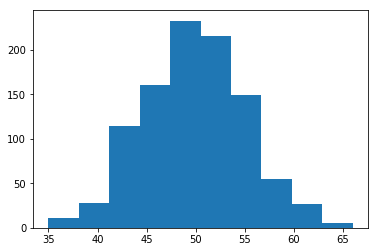

In [0]:
np.random.seed(20)

results = simulate_flipping(1000)
plt.hist(results)

In [0]:
num_60more = sum(results>=60)
prop_60more = num_60more / len(results)

print(num_60more)
print(prop_60more)

32
0.032


5. According to the exercise in question #4 explain:
    - If you were to create a hypothesis test, what would your null hypothesis be? (specifically for question #4)
    - What is your P-value? (specifically for question #4)

H0: The probability of 60 heads or more is equal to 2.8443967% (i.e the coin is fair)

Note: 2.8443967% is the probability of 60 or more heads out of 100 based on a binomial distribution with parameter p=0.5

In [0]:
def print_test_results(p_value, null_hyp, alpha=0.05):
    print("H0: {}\n".format(null_hyp))
    print("Results: p-value = {}\n".format(p_value))
    if p_value < alpha:
        print("Null hypothesis rejected at alpha = {} level.".format(alpha))
    else:
        print("Fail to reject null hypothesis at alpha = {} level.".format(alpha))


In [1]:
import statsmodels.api as sm

null_val = 0.028443967
z, p_val = sm.stats.proportions_ztest(num_60more, 1000, null_val)


null_hyp = "The probability of 60 heads or more is equal to 2.8443967% (i.e the coin is fair)"

print_test_results(p_val, null_hyp)


NameError: name 'num_60more' is not defined

6. Load the student-mat.csv dataset and perform a t-test comparing final grades of males vs females. Before running the test, remove individuals that scored 0. Use only the sex and G3 (final grade) columns to run your test.
    
    - Is there a significant difference between how women and men perform? 
    - What is your p-value? How would you interpret it?

In [0]:
import pandas as pd

df = pd.read_csv('student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
df_no_zero = df[df.G3!=0]
print('orig count: {}'.format(len(df)))
print('num removed: {}'.format(len(df[df.G3==0])))
print('remaining count: {}'.format(len(df_no_zero)))

orig count: 395
num removed: 38
remaining count: 357


In [0]:
#check that all were male or female
df_no_zero.groupby('sex').size()

sex
F    185
M    172
dtype: int64

In [0]:
men_results = df_no_zero[df_no_zero.sex=='M'].G3

women_results = df_no_zero[df_no_zero.sex=='F'].G3
len(men_results), len(women_results)

(172, 185)

In [0]:
mu_men = np.mean(men_results)
mu_women = np.mean(women_results)


sd_men = np.std(men_results, ddof=1)
sd_women = np.std(women_results, ddof=1)


# just to get an idea, won't actually use in test function
mu_men, mu_women, sd_men, sd_women

(11.866279069767442, 11.205405405405406, 3.258748386186274, 3.174451848089711)

In [0]:
from scipy.stats import ttest_ind

t, p_val = ttest_ind(men_results, women_results, equal_var=False)

null_hyp = 'There is no difference in the mean grades for men and women.'

print_test_results(p_val, null_hyp)

H0: There is no difference in the mean grades for men and women.

Results: p-value = 0.05334760933558726

Fail to reject null hypothesis at alpha = 0.05 level.
